# CS530 Homework 10



#### Question 1 (2.5 points)

Complete the in-class group work that we started on Monday (April 12, 2021) **with the group with whom you worked in class**. Only one person needs to submit a colab link. But make sure to include the names of all the people in your group in your submission. 

Group Members: Nojoud AlMohanna, Toby Chappell, Raha Pirzadeh

https://colab.research.google.com/drive/1S_9FQIqQYUacnh9dTLR7Aq4sREcE53hg?usp=sharing

#### Question 2 (2.5 points)

**Complete this question on your own and submit it individually.**

a. Use the classifiers listed in the following blocks to run classification on the 3 datasets provided along with the homework ('dataset1.csv', 'dataset2.csv', 'dataset3.csv'). Use train-test-split and compute the AUC on the test sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
import random
import math

In [ ]:
clfs = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025, probability=True),
    "RBF SVM": SVC(gamma=2, C=1, probability=True),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "LDA": LinearDiscriminantAnalysis()}

In [ ]:
def make_auc(dataset):
    X = dataset.drop(columns=["y"])
    y = dataset["y"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    aucs = []
    clf_names = []
    
    for clf in clfs:
        prob = clfs[clf].fit(X_train, y_train).predict_proba(X_test)
        auc = round(metrics.roc_auc_score(y_test, prob[:,1]),4)
        aucs.append(auc)
        clf_names.append(clf)
    
    return pd.DataFrame({'AUC': aucs, 'Classifier': clf_names})

In [ ]:
dataset1 = pd.read_csv("dataset1.csv")
dataset2 = pd.read_csv("dataset2.csv")
dataset3 = pd.read_csv("dataset3.csv")
d1_aucs = make_auc(dataset1)
d2_aucs = make_auc(dataset2)
d3_aucs = make_auc(dataset3)

In [ ]:
d1_aucs['Dataset'] = 'Dataset1'
d2_aucs['Dataset'] = 'Dataset2'
d3_aucs['Dataset'] = 'Dataset3'

aucs = pd.concat([d1_aucs, d2_aucs, d3_aucs], axis=0).reset_index(drop=True)

In [ ]:
print(aucs)

       AUC         Classifier   Dataset
0   0.8825  Nearest Neighbors  Dataset1
1   0.5450         Linear SVM  Dataset1
2   0.9400            RBF SVM  Dataset1
3   0.6250      Decision Tree  Dataset1
4   0.7800      Random Forest  Dataset1
5   0.8600           AdaBoost  Dataset1
6   0.4550                LDA  Dataset1
7   0.9621  Nearest Neighbors  Dataset2
8   0.9509         Linear SVM  Dataset2
9   0.9777            RBF SVM  Dataset2
10  0.9308      Decision Tree  Dataset2
11  0.9777      Random Forest  Dataset2
12  0.9241           AdaBoost  Dataset2
13  0.9688                LDA  Dataset2
14  0.9420  Nearest Neighbors  Dataset3
15  0.9554         Linear SVM  Dataset3
16  0.9509            RBF SVM  Dataset3
17  0.8661      Decision Tree  Dataset3
18  0.9375      Random Forest  Dataset3
19  0.9353           AdaBoost  Dataset3
20  0.9286                LDA  Dataset3


b. Use a bar plot to visualize the results you get from 2a. The x-axis should be the three datasets. The y-axis should be the AUC. The color for the bars should be the different algorithms.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


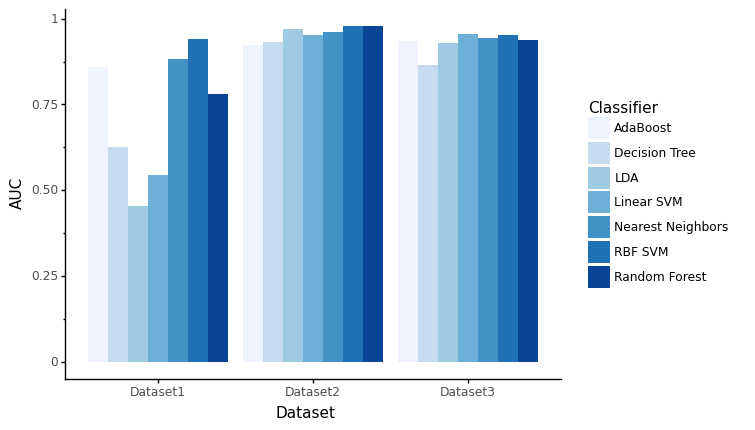

<ggplot: (8766454156457)>

In [ ]:
from plotnine import ggplot,aes,geom_bar,theme_classic,scale_fill_brewer
(
  ggplot(aucs,aes(x="Dataset",y="AUC",fill="Classifier")) 
  + geom_bar(stat="identity",position="dodge")
  + theme_classic()
  + scale_fill_brewer()
)

c. Perform PCA on the three datasets ('dataset1.csv', 'dataset2.csv', 'dataset3.csv'), and only keep the first 2 principal components.

In [ ]:
pca = PCA(n_components=2)
dataset1_pca = pca.fit_transform(dataset1.drop(columns=["y"]))
dataset2_pca = pca.fit_transform(dataset2.drop(columns=["y"]))
dataset3_pca = pca.fit_transform(dataset3.drop(columns=["y"]))

dataset1_pca = pd.DataFrame({"PCA1":dataset1_pca[:,0],"PCA2":dataset1_pca[:,1],"y":dataset1["y"]})
dataset2_pca = pd.DataFrame({"PCA1":dataset2_pca[:,0],"PCA2":dataset2_pca[:,1],"y":dataset2["y"]})
dataset3_pca = pd.DataFrame({"PCA1":dataset3_pca[:,0],"PCA2":dataset3_pca[:,1],"y":dataset3["y"]})

d. Train the classifiers defined in 2a to classify on the PCA transformed data from c. Perform train-test-split and compute the AUC on the test sets. 

In [ ]:
d1_pca_aucs = make_auc(dataset1_pca)
d2_pca_aucs = make_auc(dataset2_pca)
d3_pca_aucs = make_auc(dataset3_pca)

d1_pca_aucs['Dataset'] = 'Dataset1'
d2_pca_aucs['Dataset'] = 'Dataset2'
d3_pca_aucs['Dataset'] = 'Dataset3'

aucs_pca = pd.concat([d1_pca_aucs, d2_pca_aucs, d3_pca_aucs], axis=0).reset_index(drop=True)   

In [ ]:
print(aucs_pca)

       AUC         Classifier   Dataset
0   0.9700  Nearest Neighbors  Dataset1
1   0.5150         Linear SVM  Dataset1
2   1.0000            RBF SVM  Dataset1
3   0.9175      Decision Tree  Dataset1
4   0.9400      Random Forest  Dataset1
5   0.9350           AdaBoost  Dataset1
6   0.5300                LDA  Dataset1
7   0.9955  Nearest Neighbors  Dataset2
8   0.9509         Linear SVM  Dataset2
9   0.9866            RBF SVM  Dataset2
10  0.8884      Decision Tree  Dataset2
11  0.9576      Random Forest  Dataset2
12  0.9710           AdaBoost  Dataset2
13  0.9777                LDA  Dataset2
14  0.8884  Nearest Neighbors  Dataset3
15  0.9554         Linear SVM  Dataset3
16  0.9018            RBF SVM  Dataset3
17  0.8705      Decision Tree  Dataset3
18  0.9286      Random Forest  Dataset3
19  0.9487           AdaBoost  Dataset3
20  0.9464                LDA  Dataset3


e. Use a bar plot to visualize the results you get from 1b. The x-axis should be the three datasets. The y-axis should be the AUC. The color for the bars should be the different algorithms.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


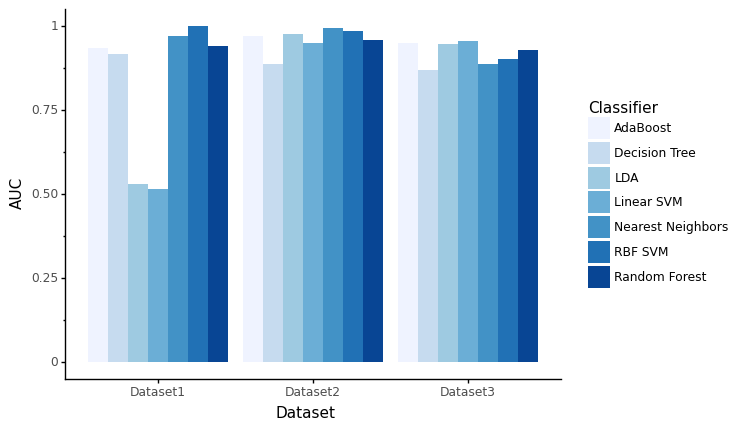

<ggplot: (8766443951329)>

In [ ]:
(
  ggplot(aucs_pca,aes(x="Dataset",y="AUC",fill="Classifier")) 
  + geom_bar(stat="identity",position="dodge")
  + theme_classic()
  + scale_fill_brewer()
)

f. Use the plotting function below to visualize the decision boundary of each algorithms on each dataset. The function takes 3 inputs, clf, the classifier object, X, a two-dimensional numpy array, and y, a one-dimensional numpy array.

In [ ]:
def plot_decision_boundary(clf, X, y): 
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    # Train test split
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
    
    # Perform PCA
    pca = PCA(n_components=2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    # Set up plotting mesh
    # Step size of the mesh
    h = .02 
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Classification
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each

    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    
    return score

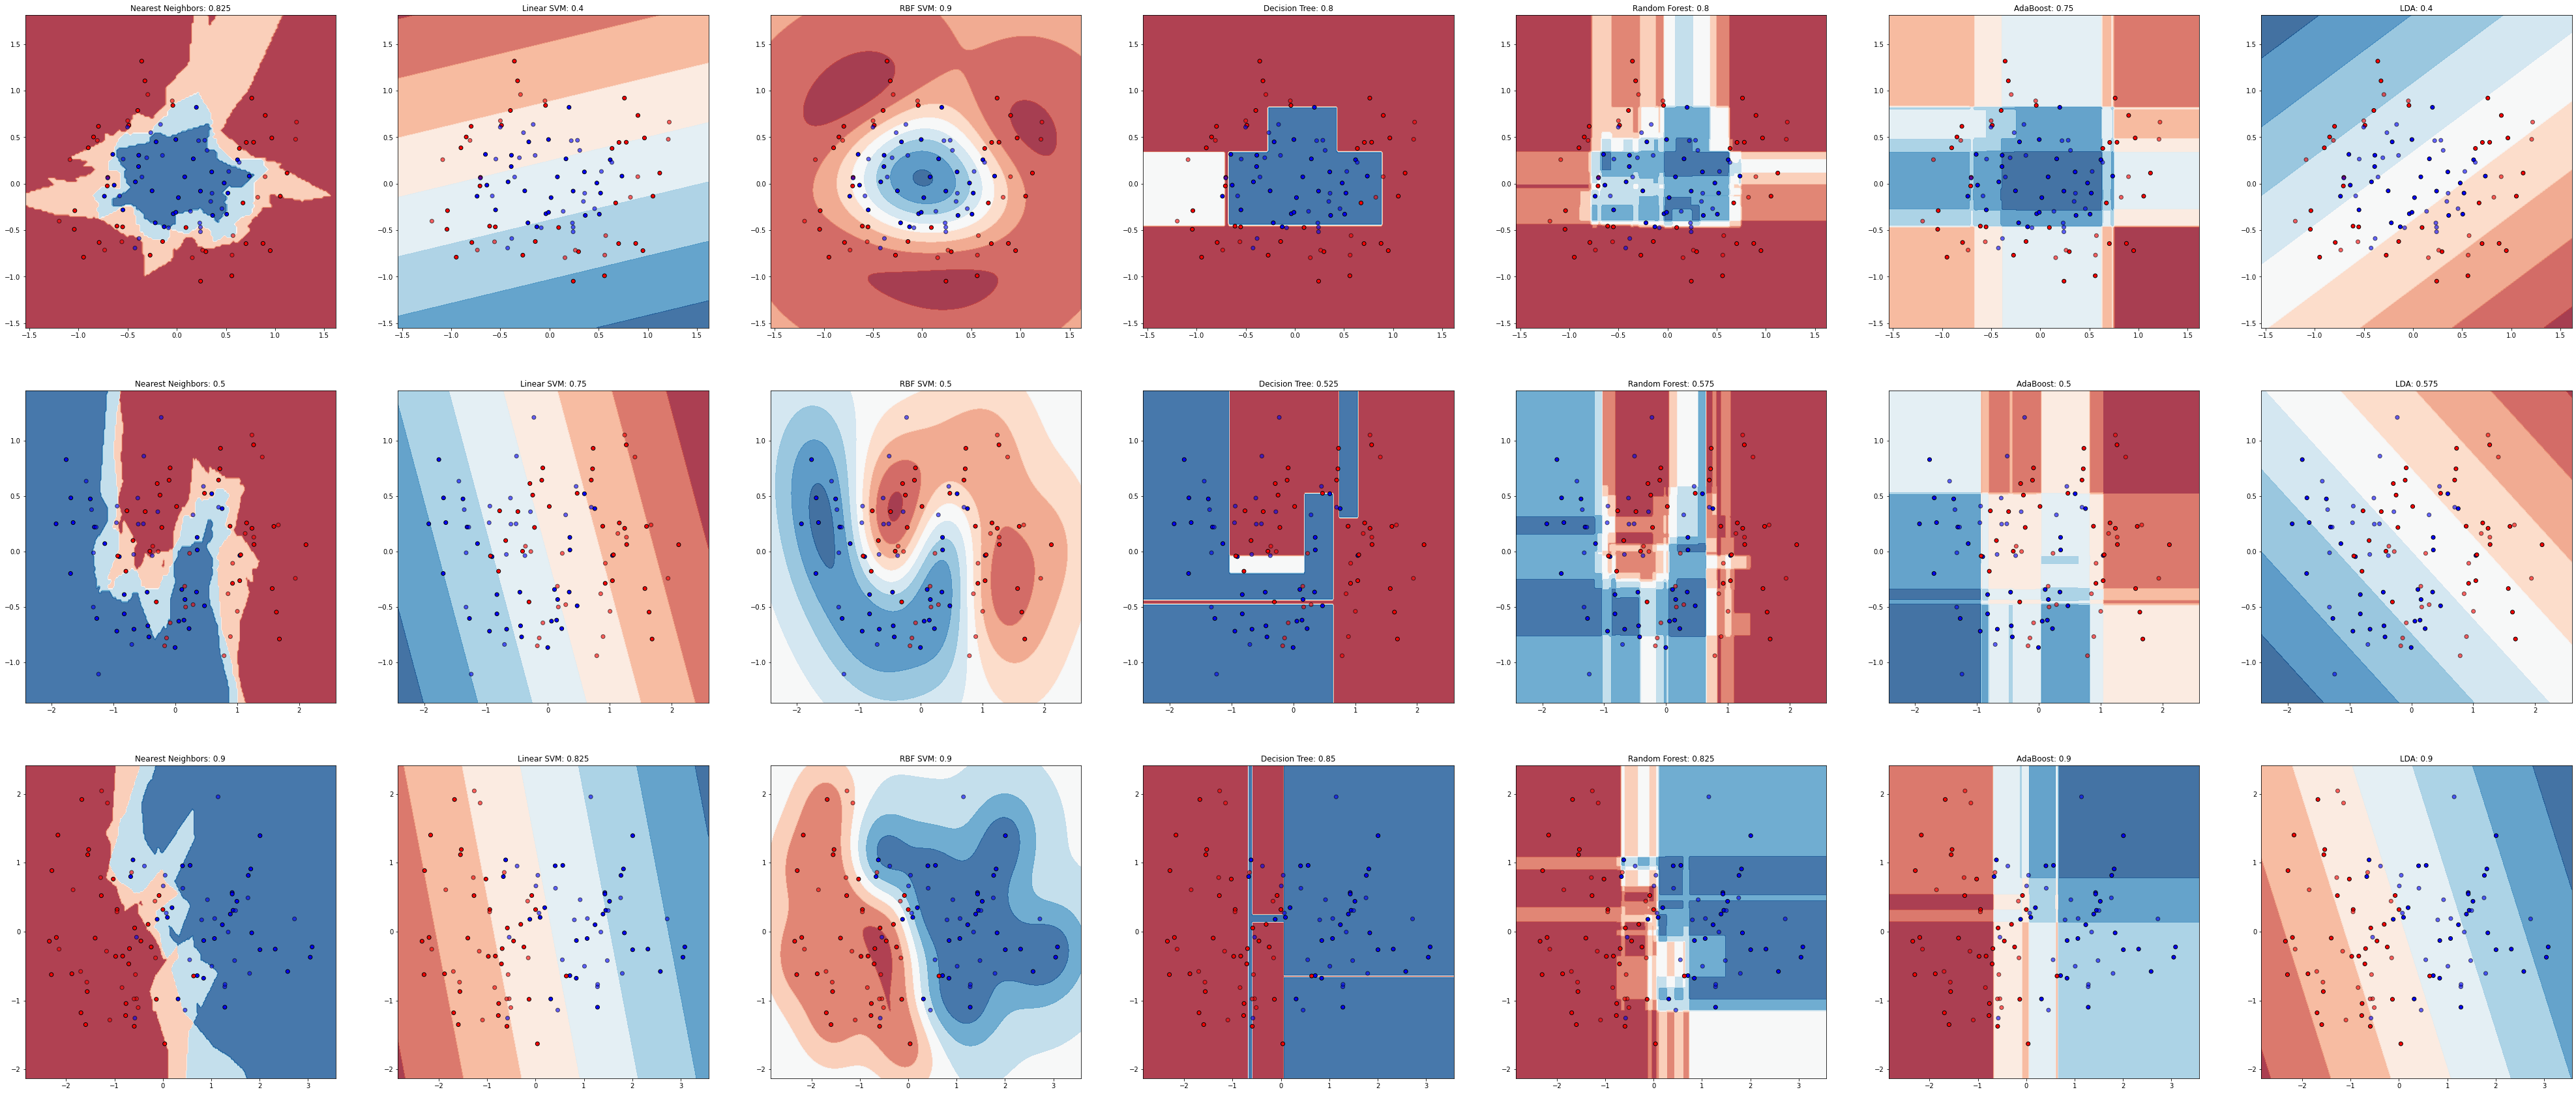

In [ ]:
plt.figure(figsize=(70,30))
i = 1
datasets = [dataset1,dataset2,dataset3]
for dataset in datasets:
  for clf in clfs:
    plt.subplot(3,7,i)
    score = plot_decision_boundary(clfs[clf], dataset.drop(columns=["y"]),dataset["y"])
    plt.title("{}: {}".format(clf,score))
    i = i + 1

#### Question 3 (2.5 points)

**Complete this question on your own and submit it individually.**

This question aims to demonstrate the nonlinear projection and kernel functions that we discussed  for SVM. 

We saw see 3 cases for SVM:

1.   For linearly separable classes SVMs work well. It finds a maximal-margin separator that then tends to generalize well to unseen data.
2.   For classes that are almost linearly separable, SVMs can still be made to work pretty well by introducing some slack that lets it find a maximal-margin classifier while allowing some samples to violate the margin or even violate the separator. Though how much slack to introduce is a hyperparameter that needs to be tuned.
3.   When the classes are not even close to linearly separable, we can project the data to a higher-dimensional space, where we could (hopefully) reduce the problem to  situation (1) or (2) above and then solve it.

What do we mean by projecting the data in situation (3)? We would need to transform the data to a higher-dimensional space. What then? Then, we find the separator in that high-dimensional space, and then transform the data back to the original space and see what the separator is in that original space.  

However, in real life, such projections are computationally expensive, especially if the dimensionality of the space to which we project is very high. However, there is a way that the SVM algorithm would not actually need to project the data to a higher-dimensional space. Instead, SVM makes use of the fact that all of the mathematical machinary on which the SVM algorithm relies require only dot product operations between pairs of data points (when thinking about our samples represented as vectors). (If you want to dive into the math and understand why only the dot products are used, read the chapter on Support Vector Machines in the ESL book, and in particular pp. 420-425.)

Now, as we need only the dot products to compute the SVM model, this is also true when we seek the maximal-margin separator in the higher-dimensional space to which we project our original data. So, instead of actually projecting the data to the high-dimensional space, we can use the kernels to compute only the required dot products in this high-dimensional space. In other words, the kernel function takes two points in the original space as inputs and directly outputs the dot product in the high-dimensional, projected space.

This all sounds rather vague. So, let's try it out and make it more concrete.

(a) Let us work on a dataset that has 2 features,  $(x_1,x_2)\in \mathbb{R}^2$, each composed of 1000 samples, and is composed of 2 classes. The first class includes 1000 samples that are uniformly drawn from within the unit circle. (In other words, in polar coordinates, the angle, $\theta$, for each sample could be any that satisfies $\theta \in [0,2\pi)$ radians (or in $[0,360)$ in degrees) and the radius, $r$, satisfies $r\leq1$.) 

The second class includes 1000 samples that are uniformly drawn from an annulus with an inner radius of 2 and an outer radius of 3. (In other words, and in polar coordinates again, the angle for each sample is again $\theta \in [0,2\pi)$; but the radius now satisfies $2 \leq r \leq 3$.)

Plot this dataset out, each class in a different color. Try using **linear SVM** (you can use *scikit-learn*) to classify this dataset. Use the code in Question 2 to plot the separating hyperplane (or line, in 2D) between the classes. How many support vectors are you getting this time? Is this a good classification? Explain.

(b) Let us first manually project these data to a higher dimensional space. To keep this visualizable, we will project this to 3D space. We will use the following projection: 

For some $\vec \alpha = (\alpha_1,\alpha_2)\in \mathbb{R}^2$, we will define $\phi:\mathbb{R}^2 \rightarrow \mathbb{R}^3$ such that:

$$\phi \left( \vec \alpha \right) = \phi \left( \alpha_1,\alpha_2 \right) = \left( \alpha_1^2,\alpha_2^2,\sqrt{2}\alpha_1 \alpha_2  \right)$$

Project the original data to 3D via $\phi$. And plot the 3D dataset. How well is the data linearly separable now? Use linear SVM again, on the data that was projected to 3D, to classify the 3D dataset. How well are the classes separable in the projected space? Now try to plot the separating hyperplane (also called the decision funcion) in the projected space, similarly to Question 2. How many support vectors are you getting this time?

(c) Now strive to project the separating hyperplane back to the original 2D space. What would the separator (or decision boundary or decision function) look like in the origial space? Even if you were unable to compute the separator directly, describe it as well as you can.

(d) Finally, let us see how we could do this with kernels. As discussed above, SVM only computes dot products between samples. So, for any two samples $\vec x, \vec y\in \mathbb{R}^3$, 

$$ K \left( \vec x, \vec y \right) = \phi \left( \vec x \right) \cdot \phi \left( \vec y \right).$$

Compute the appropriate $ K \left( \vec x, \vec y \right)$ for the $\phi$ defined above. What is the formula for $ K \left( \vec x, \vec y \right)$? 

Last, if we wanted to compute $\phi \left( \vec x \right) \cdot \phi \left( \vec y \right)$ directly (i.e., by projecting the 2D data to 3D), how many multiplication and addition operations would we have to carry out? How about when we compute it using the kernel, how many multiplication and addition operations would we need then? So, generalizing from this kernel to other kernels, what is another potential advantage of kernels, and why would that matter to us? 

Finally, we learned about polynomial kernels in class. There, 

$$ K \left( \vec x, \vec y \right) = \left( \vec x \cdot \vec y + c\right)^d .$$

So, is the kernel we used above exactly a simple, 2nd-order polynomial kernel (with $c=1$ and $d=2$ in the above)? Explain why it is or is not. If it is not the same, what is the difference between the two kernels?

Note that this is a toy problem that we kept low-dimensional for the sake of visualization. In real life, the dimensions of the data and of the projection space may be much higher (in case of the projection space, even infinite).

a.

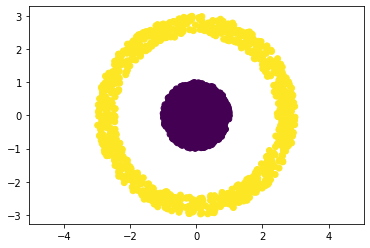

In [7]:
dataset = []
for i in range(1000):
  r0, theta0 = [math.sqrt(random.random()), 2*math.pi*random.random()]
  dataset.append([r0*math.cos(theta0),r0*math.sin(theta0),0])
  r1, theta1 = [math.sqrt(random.random()+2)*math.sqrt(3), 2*math.pi*random.random()]
  dataset.append([r1*math.cos(theta1),r1*math.sin(theta1),1])
dataset = pd.DataFrame(dataset)
plt.axis("equal")
plt.scatter(dataset.iloc[:,0],dataset.iloc[:,1],c=dataset.iloc[:,2])

Number of Support Vectors: 1183


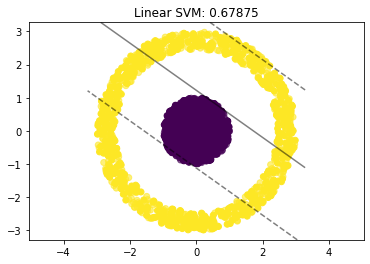

In [3]:
clf = SVC(kernel="linear")
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,[0,1]], dataset.iloc[:,2], test_size=.4, random_state=42)
X = dataset.iloc[:,[0,1]]
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, alpha=0.6)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title("Linear SVM: {}".format(score))
plt.axis("equal")
print("Number of Support Vectors:",clf.support_vectors_.shape[0])

There are 1139 support vectors. This classification is not doing great (with a score of 0.71125) due to the fact that the data is nonlinear (a linear SVM requires the data to be linearly seperable or at least nearly linearly seperable). 

Plotting: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

b.

Number of Support Vectors: 5


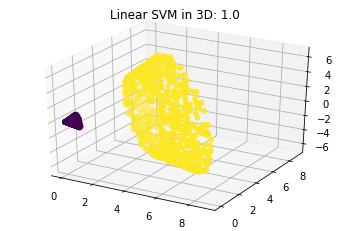

In [ ]:
dataset_phi = pd.DataFrame()
dataset_phi["X1"] = dataset.iloc[:,0]**2
dataset_phi["X2"] = dataset.iloc[:,1]**2
dataset_phi["X3"] = dataset.iloc[:,0]*dataset.iloc[:,1]*math.sqrt(2)
dataset_phi["y"] = dataset.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(dataset_phi.drop(columns=["y"]), dataset_phi["y"], test_size=.4, random_state=42)
clf = SVC(kernel="linear")
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
ax = plt.axes(projection='3d')
ax.scatter(dataset_phi["X1"], dataset_phi["X2"], dataset_phi["X3"], c=dataset_phi["y"])
plt.title("Linear SVM in 3D: {}".format(score))
print("Number of Support Vectors:",clf.support_vectors_.shape[0])

Number of Support Vectors: 5


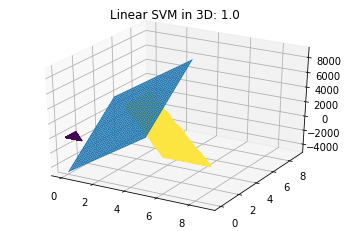

In [40]:
from mpl_toolkits.mplot3d import Axes3D

dataset_phi = pd.DataFrame()
dataset_phi["X1"] = dataset.iloc[:,0]**2
dataset_phi["X2"] = dataset.iloc[:,1]**2
dataset_phi["X3"] = dataset.iloc[:,0]*dataset.iloc[:,1]*math.sqrt(2)
dataset_phi["y"] = dataset.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(dataset_phi.drop(columns=["y"]), dataset_phi["y"], test_size=.4, random_state=42)
model = SVC(kernel="linear")
clf = model.fit(X_train,y_train)
score = clf.score(X_test,y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x - clf.coef_[0][1]*y)/clf.coef_[0][2]

tmp = np.linspace(0,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(X_train[y_train==0,0], X_train[y_train==0,1], X_train[y_train==0,2],'#430753')
ax.plot3D(X_test[y_test==0,0], X_test[y_test==0,1], X_test[y_test==0,2],'#430753',alpha=0.6)
ax.plot3D(X_train[y_train==1,0], X_train[y_train==1,1], X_train[y_train==1,2],'#FCE540')
ax.plot3D(X_test[y_test==1,0], X_test[y_test==1,1], X_test[y_test==1,2],'#FCE540',alpha=0.6)
z=z(x,y)
ax.plot_surface(x, y, z)
#ax.view_init(225, 0)
plt.title("Linear SVM in 3D: {}".format(score))
print("Number of Support Vectors:",clf.support_vectors_.shape[0])

There are now only 5 support vectors. The data is linearly seperable in this dimension and as such the classifier is perfectly accuracte.

c.

Since the data consists of two circles logically the decision boundry must be circular and lies between the two classes in order to guarantee perfect separation. To plot this boundary, we would need an inverse function of $\phi$ that takes a 3D point back into 2D. Then we can apply this function to the 3D decision boundary plane and convert it back into 2D.

d.

$$ 
\begin{align}
K (\vec{x}, \vec{y}) &= \phi (\vec{x}) \cdot \phi ( \vec{y}) \\
&= (x_1^2,x_2^2,\sqrt{2}x_1x_2) \cdot (y_1^2,y_2^2,\sqrt{2}y_1y_2) \\
&= x_1^2x_2^2 + 2x_1x_2y_1y_2 + y_1^2y_2^2 \\
&= (x_1x_2 + y_1y_2)^2 \\
&= (\vec{x} \cdot \vec{y})^2
\end{align}
$$


The total number of operations in the projecting into 3D would be 13 (10 multiplications and 3 additions). For this kernel, the total number of operations is 4 (3 multiplications and 1 addition). Thus, the primary advantage of kernels is that is computationally cheaper compared to actually projecting the data into higher dimensions. The kernel is the same as a 2nd-order polynomial with c=0 and d=2 since it can be written as such as shown by the last line of proof.

Resource: https://www.kdnuggets.com/2017/08/support-vector-machines-learning-svms-examples.html/3

#### Question 4 (2.5 points)

**Complete question 4 in your final-project group.**  Only one person needs to submit the answers to the following by providing a colab link with the following code snipets/information. Make sure to include the names of all the people in your group with your submission. 

If you have not started already, you should now begin cleaning your data, if this is necessary for your dataset.  Provide the code (best practice is to document your code, this is good for you and for your team, and it makes it easier on us too) that you used to clean your data. This might include identifying outliers; imputing missing data, if necessary; removing bad samples (this might mean removing bad trial or subjects in human-subjects data); and so on. What have you learned from this process?

Now, preliminarily run at last 2 classifiers or regressors on your dataset (whatever makes sense for your problem) and report accuracy and AUC for each model. What have you learned from this process?

Provide at least 2 visualizations that makes sense for you data. These may include a new scatter plot of your cleaned data; a dimensionality-reduced plot of your data and its classes or is regression; and accuracy plot from your models in the previous part, perhaps in relation to some parameter that is important for your data. One example of the latter might be, say, the accuracy of your model plotted against the size of some parameter that determines how aggressively you clean your data. It is up to you to decide which 2 visualizations to plot. But make sure that you explain what you decided to visualize and why. As before, what have you learned from this process?

Discuss: What have you learned about your data/problem?  Now that you have done some cleaning of your data are you still planning to use the same method?  What problems do you foresee in modeling the data? 



https://colab.research.google.com/drive/1W17-DqZFoQJ72kkJTLwKHtDzETHiR2Wq?usp=sharing